# Applications of the Derivative

**Goals:**
- Explore applications of the first derivative
    - Shapes of Curves - increasing, decreasing, concave up, concave down 
    - Maximum and Minimums
    - Optimization

In [2]:
#Make sure this cell has run
#Importing some libraries and functions we need
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.misc import derivative
from sympy import solve
from scipy.optimize import curve_fit


In [3]:
# defines a derivative - calculating it numerically (not symbolically)- basically estimating the derivative 
# we are using this just so we don't have to keep declaring x as a symbol and then redefine it as a list of numbers as we go throughout the notebook

def derv(x):
    return (f(x+0.000001) - f(x))/0.000001



In [4]:
# defines second derivative - calculating it numerically (not symbolically)
def secondderv(x):
    return (derv(x+0.000001)-derv(x))/0.000001

We are using this just so we don't have to keep declaring x as a symbol and then redefine it as a list of numbers as we go throughout the notebook

We also know the command from last lab how to symbollically find the derivative
sy.diff  and we can use that as long as we define x to be a symbol first, so you can use that later on if you want.


## Shapes of Curves

In [5]:
# defines the function 
def f(x):
    return x**2

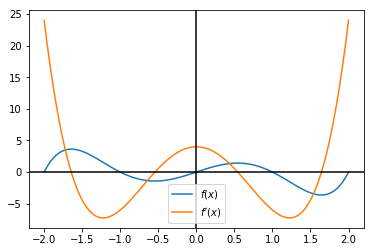

In [10]:
x = np.linspace(-2, 2, 100)

# plot of function and its derivative
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, derv(x), label = "$f'(x)$")
plt.legend(loc = 'best')
plt.axhline(color = 'black')
plt.axvline(color = 'black')

Make some conjectures about how the derivative relates to the function or the shape of the function. What do you think the derivaitve can tell us?



When the function is increasing the derivaitve is...

When the function is decreasing the derivaitve is...

When the function goes from increasing to decreasing (or vice versa) the derivative...

### Making a Function

Suppose we wanted to make a function with a few zeros between $x = [-3, 3]$. 

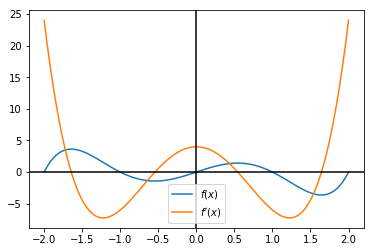

In [11]:

def f(x):
    return x*(x - 2)*(x - 1)*(x + 1)*( x + 2)

plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, derv(x), label = "$f'(x)$")
plt.legend(loc = 'best')
plt.axhline(color = 'black')
plt.axvline(color = 'black')

Were your conjectures correct above?

### A Function for Plotting Both

In [30]:
#Defined a new function called pair_plot that plots the function and its derivative on the same graph.
# using pair_plot requires the input variable (like x), and then the function name (such as f or g)
def pair_plot(x, f):
    plt.plot(x, f(x), label = '$f(x)$')
    plt.plot(x, derv(x), label = "$f'(x)$")
    plt.legend(loc = 'best')
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')
    plt.ylim(-5,5)

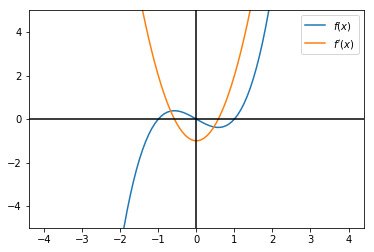

In [53]:
x = np.linspace(-4,4,100)
def f(x): return x*(x - 1)*(x + 1)
pair_plot(x, f)



In [25]:
def triple_plot(x, f):
    plt.plot(x, f(x), label = '$f(x)$')
    plt.plot(x, derv(x), label = "$f'(x)$")
    plt.plot(x, secondderv(x), label="$f''(x)$")
    plt.legend(loc = 'best')
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')
    plt.ylim(-5,5)

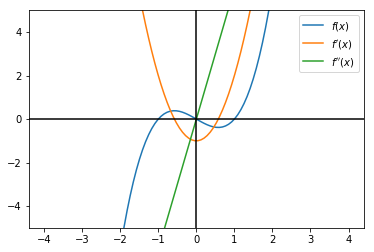

In [55]:
triple_plot(x, f)

### Exploration

Using your own function with at least 3 zeros between $x = [-4, 4]$, please answer the following questions:

1. What kind of behavior occurs when $f'(x) > 0$?
2. What kind of behavior occurs when $f'(x) < 0$?
3. What kind of behavior occurs when $f'(x) = 0$?
4. What is happening when $f''(x) > 0$?
5. What is happening when $f''(x) < 0$?

### Summarize more of what you discovered

When the second derivative is positive...

When the second derivative is negative...

How do we find out when these changes from positive to negative or vice versa happen?

In [64]:
def f(x): return x*(x - 1)*(x + 1)
x=sy.Symbol('x')
sy.diff(f(x),x)

x*(x - 1) + x*(x + 1) + (x - 1)*(x + 1)

In [65]:
def df(x): return x*(x - 1) + x*(x + 1) + (x - 1)*(x + 1)

In [66]:
solve(f(x))

[-1, 0, 1]

In [67]:
critical_points=solve(f(x))
critical_points

[-1, 0, 1]

In [68]:
A=critical_points[0]
B=critical_points[1]
C=critical_points[2]
print(A,B,C)

-1 0 1


In [70]:
print(df(-2))
print(df(-.5))
print(df(.5))
print(df(2))

11
-0.25
-0.25
11


So where was this function increasing?  Then decreasing?


Let's do the same for concavity?


In [74]:
sy.diff(f(x),x,2)


6*x

In [75]:
def ddf(x): return 6*x

In [76]:
maybe_inflection_points=solve(ddf(x))
maybe_inflection_points

[0]

In [77]:
print(ddf(-1))
print(ddf(1))

-6
6


### Summarize what we just did

### Example
Let's take a look at the years, sales, and advertising dollars of smokeless tobacco from last lab.  


The  data in the CSV file on blackboard, has Years, Sales in Pounds, Sales in Dollars, and Advertising and Promotional Expenditures for smokeless tobacco products from 2000-2016. 



In [88]:
import csv 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon
import datetime as dt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv("smokelesstobacco.csv")  
print(df)



    Year       Pounds       Sales  Advertising
0   2000  111,741,335  1988875535    224582757
1   2001  112,193,550  2127520387    236676917
2   2002  112,148,366  2362166931    234645000
3   2003  112,924,505  2489501857    242514000
4   2004  116,768,672  2617388686    231084000
5   2005  116,197,005  2611292547    250792000
6   2006  115,818,739  2593436592    354123000
7   2007  118,234,763  2695462138    411239000
8   2008  119,915,125  2757087244    547873000
9   2009  117,693,273  2611908686    493071000
10  2010  120,522,070  2780437133    444494000
11  2011  122,735,863  2936852337    451985000
12  2012  125,496,642  3077403248    435927000
13  2013  128,043,919  3263105347    503161000
14  2014  127,810,528  3415702358    600786000
15  2015  129,363,158  3680195446    684938000
16  2016  131,433,651  3981902822    759348000


Text(0,0.5,'Sales in Billions of Dollars')

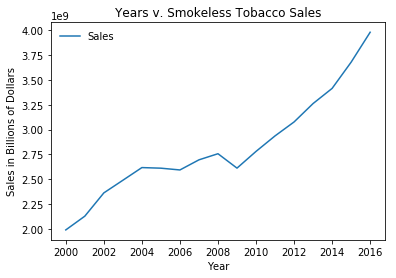

In [90]:
x=df.Year
y=df.Sales
plt.plot(x,y)
plt.title("Years v. Smokeless Tobacco Sales")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Year")
plt.ylabel("Sales in Billions of Dollars")

In [91]:
np.polyfit(x,y,3)  #fitting a 3rd degree polynomial to the data. 

array([  1.37744138e+06,  -8.29324180e+09,   1.66439027e+13,
        -1.11343673e+16])

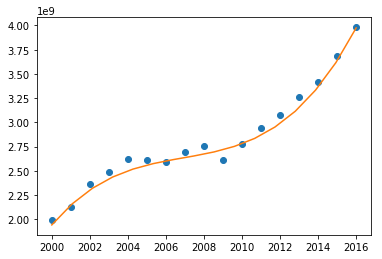

In [92]:
def s(t):
    return 1377441.38*t**3-8293241800*t**2+16643902700000*t-11134367300000000

t=np.linspace(2000,2016,16)

plt.plot(x,y,'o')
plt.plot(t, s(t))



Last lab many of you all suggested that the sales were increasing the fastest between 2014 and 2016.   
We can tell that this function is increasing everywhere, so what would that mean about the derivative? 

In [93]:
t=sy.Symbol('t')
sy.diff(s(t),t)

4132324.14*t**2 - 16586483600*t + 16643902700000

What is the rate of change of sales in 2002? 2010? 2016?


When does it look like the sales were growing the slowest? 


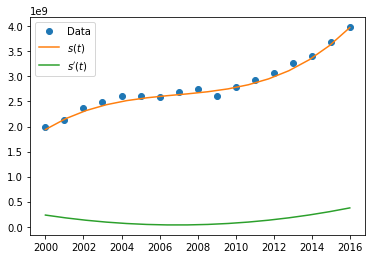

In [95]:
t=np.linspace(2000,2016,16)

def ds(t):
    return 4132324.14*t**2 - 16586483600*t + 16643902700000
def dds(t): return 8264648.28*t - 16586483600
plt.plot(x,y,'o',label = 'Data')
plt.plot(t, s(t), label = '$s(t)$')
plt.plot(t, ds(t), label = "$s'(t)$")


plt.legend(loc = 'best')

In [ ]:
t=sy.Symbol('t')
sy.diff(s(t),t,2)

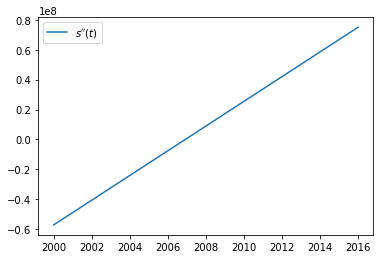

In [96]:
plt.plot(t, dds(t), label="$s''(t)$")  #plot of the second derivaitve zoomed in since we couldn't tell much about it on previous graph.
plt.legend(loc = 'best')

# Maximum and Minimum Values

Both Pierre de Fermat and G. Wilhelm Leibniz wrote about problems involving maxima and minima of curves.  Fermat was interested in the problem of cutting a line so that the product of the length of the resulting segments was maximized.  

Leibniz was interested in understanding the sign change in differences as a way to notice maximum and minimum values of curves.  We follow Leibniz to investigate two simple problems.  

First, consider sequence $f_i = i^2$ for $i$ in $[-2,2]$.

In [97]:
f = [i**2 for i in np.linspace(-2,2,10)]

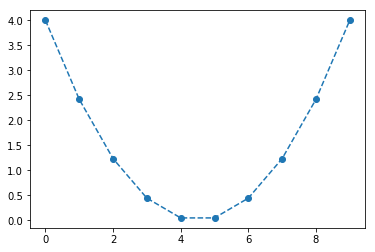

In [98]:
plt.plot(f, '--o')


Now, consider the differences of these terms. Recall that we can find this with the np.diff() function. We also include a horizontal axis to note the intersection and note something about the connection to where it seems the minimum value occurs.

In [99]:
diffs = np.diff(f)

Text(0.5,1,'Plot of Differences')

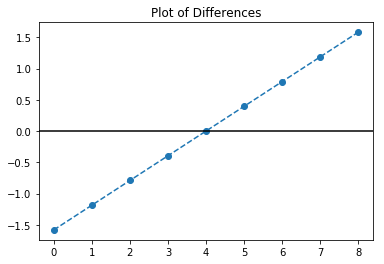

In [100]:
plt.plot(diffs, '--o')
plt.axhline(color = 'black')
plt.title("Plot of Differences")

Another example is a similar parabola flipped and pushed up one unit. The result has a maximum value instead of a minimum as we saw in the first example.

In [101]:
f = [-(i**2)+ 1 for i in np.linspace(-2,2,10)]

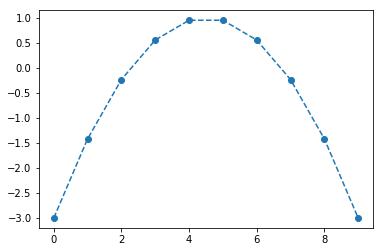

In [102]:
plt.plot(f, '--o')

In [103]:
diffs = np.diff(f)

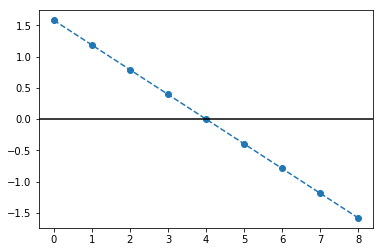

In [104]:
plt.plot(diffs, '--o')
plt.axhline(color = 'black')

## Smaller Intervals

Let's suppose we have much smaller intervals between points.  For example, suppose we take 100 points on the interval $x = [-2,2]$.  We would be interested in the change between terms, however now this is the number:

$$\Delta x = \frac{2 - (-2)}{100} = \frac{1}{25}$$

In [105]:
def f(x):
    return (x+2) * (x) * (x - 1) 

In [106]:
x = np.linspace(-2,2, 100)
dx = (4)/(100)

In [107]:
diffs = np.diff(f(x))/dx

Text(0.5,1,'Differences in Terms')

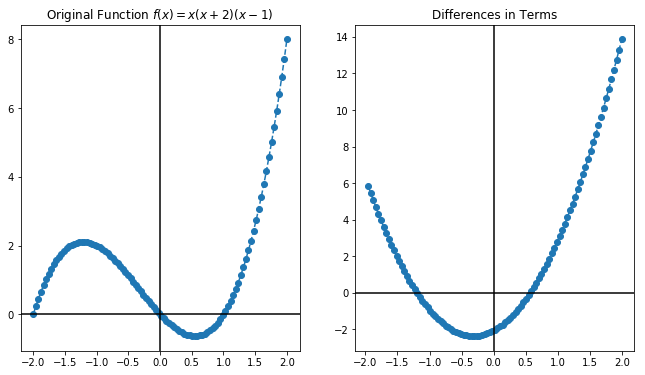

In [108]:
plt.figure(figsize = (11, 6))
plt.subplot(1, 2, 1)
plt.plot(x, f(x), '--o')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.title("Original Function $f(x) = x(x+2)(x-1)$")

plt.subplot(1, 2, 2)
plt.plot(x[1:], diffs, '--o')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.title("Differences in Terms")

We notice something about the maximum and minimum values, at least locally.  When the graph of the function changes direction, the differences are zero.  Also, the point considered a **local maximum** that occurs between $x = -1.5$ and $x = -1.0$, the differences change from positive to negative.  Similarly for the **local minimum** near $x = 0.5$, the differences change from negative to positive.

In [12]:
def f(x):
    return -1*(x+2) * (x) * (x - 1) 

In [13]:
x = np.linspace(-2,2, 100)
dx = (4)/(100)
diffs = np.diff(f(x))/dx

Text(0.5,1,'Differences in Terms')

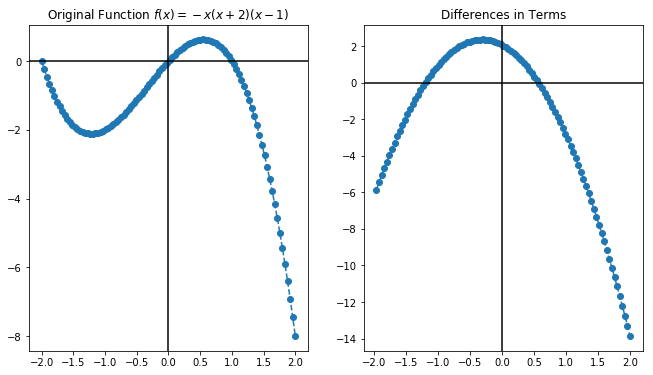

In [14]:
plt.figure(figsize = (11, 6))
plt.subplot(1, 2, 1)
plt.plot(x, f(x), '--o')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.title("Original Function $f(x) = -x(x+2)(x-1)$")

plt.subplot(1, 2, 2)
plt.plot(x[1:], diffs, '--o')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.title("Differences in Terms")

Let's look at one of our functions from earlier in this lab to determine where there were local max and mins?



In [18]:
def f(x): return x*(x - 1)*(x + 1)
def df(x): return x*(x - 1) + x*(x + 1) + (x - 1)*(x + 1)
def ddf(x): return 6*x

In [19]:
x=sy.Symbol('x')
critical_points=solve(f(x))
critical_points

[-1, 0, 1]

In [20]:
A=critical_points[0]
B=critical_points[1]
C=critical_points[2]
print(A,B,C)

-1 0 1


In [21]:
print(df(-2))
print(df(-.5))
print(df(.5))
print(df(2))

11
-0.25
-0.25
11


So where did the function have a local max? Local mins?

Definition- **Critical Number**: A critical number of a function $f$ is any number $x$ in the domain of $f$ such that $f'(x)=0$ or $f'(x)$

In [22]:
maybe_inflection_points=solve(ddf(x))
maybe_inflection_points

[0]

In [23]:
print(ddf(-1))
print(ddf(1))

-6
6


So where did the function have an inflection point? 


Let's check the graph and make sure we are right.


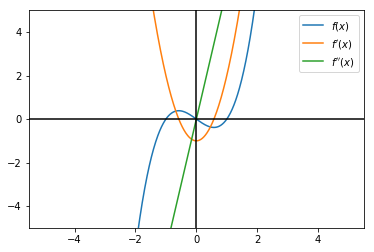

In [26]:
x=np.linspace(-5,5,1000)
triple_plot(x, f)

What if we close the interval on which we are looking?  If we do so, then we will have an absolute max and absolute min. 
Now let's look at the same function but only on the closed interval [-2,2]?



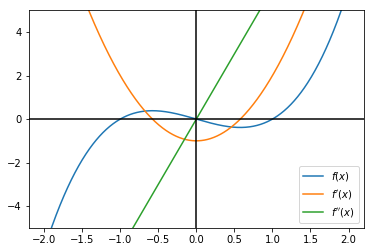

In [27]:
x=np.linspace(-2,2,1000)
triple_plot(x, f)

### Example:  Law of Diminishing Reutrns
![](lawofdimreturns.png)



Law of Diminishing Returns: In economics, diminishing returns is the decrease in the marginal (incremental) output of a production process as the amount of a single factor of production is incrementally increased, while the amounts of all other factors of production stay constant.

The law of diminishing returns states that in all productive processes, adding more of one factor of production, while holding all others constant ("ceteris paribus"), will at some point yield lower incremental per-unit returns. (source: Wikipedia)

How do you think this relates to derivatives?

Example continued:
   The total sales $S$ in thousands of dollars of Arctic Air Corporation, a manufacturer of automobile air conditioners, is related to the amount of money $x$ in thousands of dollars that the company spends on advertising its product by the formula $$ S(x)=-0.01x^3+1.5x^2+200$$ for $$  (0\leq x\leq 100) $$ 
   
   
Find the point of diminishing return for this company and what does that mean.
   


Text(0,0.5,'Sales (in thousands of dollars)')

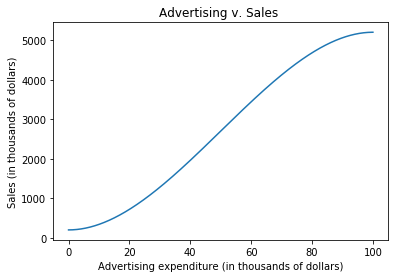

In [28]:
def s(x): return -0.01*x**3+1.5*x**2+200
x=np.linspace(0,100,100000)
plt.plot(x, s(x))
plt.title("Advertising v. Sales ")
plt.xlabel("Advertising expenditure (in thousands of dollars)")
plt.ylabel("Sales (in thousands of dollars)")


## Optimization

How could we use all of the information from the beginning of this lab? The increasing/decreasing? Mins and maxs?


### Example:
The quantity demanded each month of the Walter Serkin recording of Beethoven's *Moonlight Sonata* manufactured by Phonola Record Industries, is related to the price per disc.  The equation is $p=-0.00042x+6$  when $(0 \leq x \leq 12000)$ where $p$ denotes the unit price in dollars and $x$ is the number of discs demanded, relates the demand to the price.  The total cost (in dollars) of pressing and packaging $x$ copies of this recording is given by $C(x)=600+2x-0.00002x^2$ when $(0 \leq x \leq 20000)$.  To maximize the profits, how many copies should they produce each month and what would that profit be?

### Example:  (a look back at one from test 1)
Phillip, the proprietor of a vineyard, estimates that the first 10,000 bottles of wine produced this season will fetch a profit of \$5 per bottle, but if more than 10,000 bottles are produced, then the profit per bottle for the entire lot would drop by \$0.0002 for each additional bottle sold.  Assuming that at lesat 10,000 bottles of wine were produced and sold, what is the maximum profit?


# Name:


# For You To Do:
Please complete the following problems putting your work and answers within each question.


## 1 . 
Using the commands we used above (or in the last lab) compute the first and second derivative:

  $f(x) = x^4 - 5x^3 +3x^4+2x^2+x- 6$


Plot the function and the first and second derivaitves on the same graph with labels as to which curve is which.  

## 2 . 
Find all of the critical points, determine the intervals on which the function is increasing, decreasing, concave up, and concave down, and determine any local minimums or maximums if they exist?  Plot the function, its derivative, and second derivative on the same set of axes to verify (hint you can do this part really with one command that we defined above).  

a. $y = x^2 + 7x + 10$




b. $y = x(x - 8\sqrt{x})$

# 3 . 
Find the extreme values (absolute max and mins) of $2x^3 - 9x^2 + 12x$ on $[0, 3]$ and then on $[0,2]$.

# 4 .
Owners of a car rental company have determined that if they charge customers p dollars per day to rent a car, where $50≤p≤200$, the number of cars n they rent per day can be modeled by the linear function $n(p)=1000−5p$. If they charge 50 dollars per day or less, they will rent all their cars. If they charge 200 dollars per day or more, they will not rent any cars. Assuming the owners plan to charge customers between 50 per day and 200 per day to rent a car, how much should they charge to maximize their revenue?  (Hint: think about revenue and write a revenue function first before doing any calculus). 


# 5. 
Many public entities - such as cities, counties, states, utilities, and Indian tribes- hire firms to lobby Congress.  One goal of such lobbying is to place earmarks - money directed toward a specific project- into appropriations bills.  The amount (in millions of dollars spent by public entities on lobbying from 1998 to 2004 is given by $$ f(t)=-.425t^3+3.6571t^2+4.018t+43.7$$ $$(0 \leq t\leq 6)$$ where $t$ is measured in years with $t=0$ corresponding to 1998. 

a. Show where the function is increasing and interpret (IN WORDS AND IN CONTEXT) what that means about the spending by public entities on lobbying over these years

b.  Find the inflection point of $f$.  Interpret (IN WORDS AND IN CONTEXT) what that means about the growth of spending by the public entities on lobbying?  

(Source of data for the function Center for Public Integrity)

# 6. 
The total cost, revenue, and profit (for a perfectly competitive market) for a raspberry farm are given below, with x representing the quantity sold and y representing the profit.  Fit a curve to this data (hint it is higher order than quadratic) and use calculus (as previously shown in this notebook) to determine what the maximum profit is and at what quantity that occurs.  


Text(0,0.5,'Profit ')

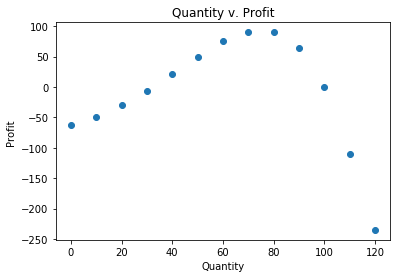

In [176]:
x=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
y=[-62, -50, -30, -6, 22, 50, 75, 90, 90, 64, 0, -110, -235]
plt.plot(x,y, 'o')
plt.title("Quantity v. Profit")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Quantity")
plt.ylabel("Profit ")


# Think about what you learned today and write about it! 
Write a short paragraph about what you learned in this notebook.  This needs to be a thoughtful, reflective paragraph.  There should be reflection on the mathematics content you learned.  
You may want to review the goals of this notebook (at the top).
***IF I DO NOT SEE A REFLECTION ON MATHEMATICS CONTENT AND WHAT YOU LEARNED ABOUT THAT YOU WILL LOSE 3 POINTS AUTOMATICALLY***  Stating "I did the derivative" is not a reflection on math content

### Please name your file following this set up:  lastname_firstname_lab_four.ipynb

**Note: where I have name of your file written you actually need to write the name of your file.  Also make sure the name has no spaces.**

# Please submit the .ipynb file and the pdf on Blackboard and please print the portion from "For You to Do" to the end and then do print preview, save as pdf. 
Please make sure you are submitting the correct type of file (.ipynb) and pdf and that it is named correctly or points will be deducted. 